# Data Exploration of Ashville, NC Airbnb
Author: Emily Padvorac

Date: April 2020

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pylab as pl
import seaborn as sns
import datetime
sns.set_style('whitegrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading dataset

#### - Load in the dataset
#### - Print the shape of the dataset

In [2]:
airbnb = pd.read_csv('listings.csv')
print("Shape of airbnb dataset", airbnb.shape)
airbnb.head()

Shape of airbnb dataset (2496, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,50,1,138,2020-02-16,1.21,1,5
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,765,1,107,2020-02-23,1.03,11,328
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.86,2,262
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,107,1,240,2020-03-15,2.28,7,338
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,71,1,67,2020-01-01,0.65,7,348


#### Print the datatypes and information of the dataframe

In [3]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2496 non-null   int64  
 1   name                            2496 non-null   object 
 2   host_id                         2496 non-null   int64  
 3   host_name                       2496 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2496 non-null   int64  
 6   latitude                        2496 non-null   float64
 7   longitude                       2496 non-null   float64
 8   room_type                       2496 non-null   object 
 9   price                           2496 non-null   int64  
 10  minimum_nights                  2496 non-null   int64  
 11  number_of_reviews               2496 non-null   int64  
 12  last_review                     23

#### Check for null values

In [5]:
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2496
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        186
reviews_per_month                  186
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Drop un-needed columns

In [6]:
airbnb.drop(['name','host_name','neighbourhood_group',
                     'last_review'], axis=1, inplace=True)

In [7]:
airbnb.head(1)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,165529,28804,35.65146,-82.62792,Private room,50,1,138,1.21,1,5


#### Replace Reviews per Month NaN values with 0 and check to make sure it worked

In [8]:
airbnb.fillna({'reviews_per_month':0}, inplace =True)
airbnb.reviews_per_month.isnull().sum()

0

#### Remove NaN values from the whole dataset

In [9]:
airbnb.isnull().sum()
airbnb.dropna(how = 'any', inplace = True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2496 entries, 0 to 2495
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2496 non-null   int64  
 1   host_id                         2496 non-null   int64  
 2   neighbourhood                   2496 non-null   int64  
 3   latitude                        2496 non-null   float64
 4   longitude                       2496 non-null   float64
 5   room_type                       2496 non-null   object 
 6   price                           2496 non-null   int64  
 7   minimum_nights                  2496 non-null   int64  
 8   number_of_reviews               2496 non-null   int64  
 9   reviews_per_month               2496 non-null   float64
 10  calculated_host_listings_count  2496 non-null   int64  
 11  availability_365                2496 non-null   int64  
dtypes: float64(3), int64(8), object(1)

#### Look at the statistics of the variables
- used Kendall method

In [10]:
airbnb.describe()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.496000e+03,2.496000e+03,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,2.426362e+07,8.372371e+07,28795.068510,35.578647,-82.556012,200.232772,4.532853,73.195112,2.808381,4.463942,191.985577
std,1.150097e+07,8.362988e+07,27.189127,0.045690,0.045518,1044.196440,19.262674,93.673252,2.471899,9.298841,125.002755
min,3.858500e+04,4.785900e+04,28704.000000,35.409760,-82.680280,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.586809e+07,1.500372e+07,28801.000000,35.567055,-82.587087,75.000000,1.000000,10.000000,0.770000,1.000000,80.000000
50%,2.433883e+07,5.041295e+07,28804.000000,35.588295,-82.556755,104.000000,2.000000,38.000000,2.360000,1.000000,179.000000
75%,3.394140e+07,1.478846e+08,28806.000000,35.605830,-82.525590,170.250000,2.000000,101.000000,4.102500,3.000000,317.000000
max,4.298005e+07,3.397152e+08,28806.000000,35.655830,-82.459980,24999.000000,777.000000,934.000000,14.480000,54.000000,365.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a232c9050>,
      dtype=object)

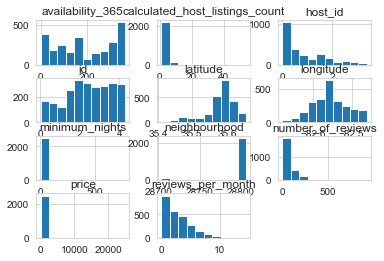

In [11]:
airbnb.hist()

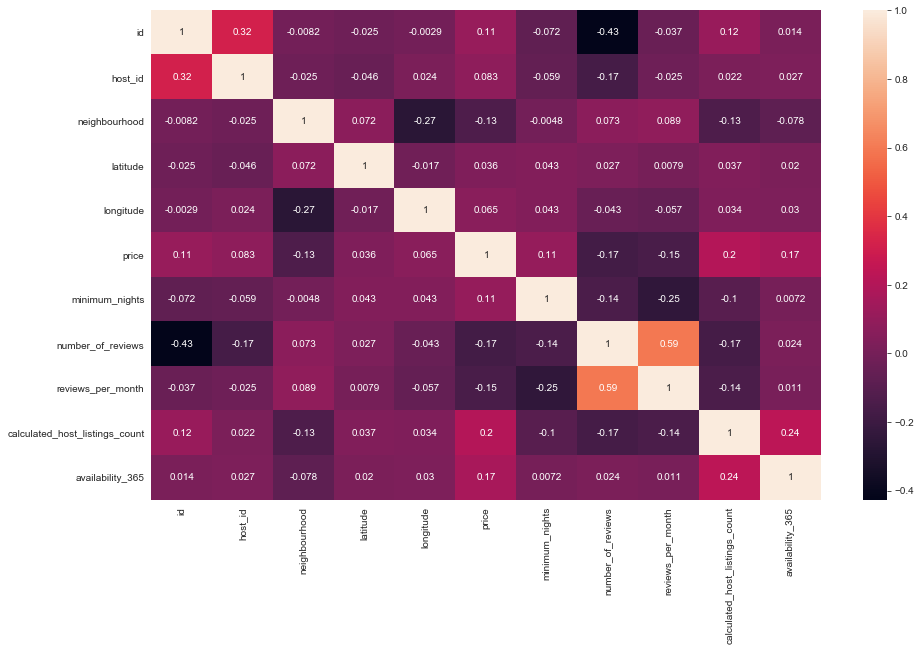

In [12]:
kcorr = airbnb.corr(method='kendall')
plt.figure(figsize = (15,9))
sns.heatmap(kcorr, annot = True)

#### Data Visualization

In [13]:
airbnb['neighbourhood'].unique()

array([28804, 28801, 28806, 28805, 28803, 28715, 28704, 28732])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

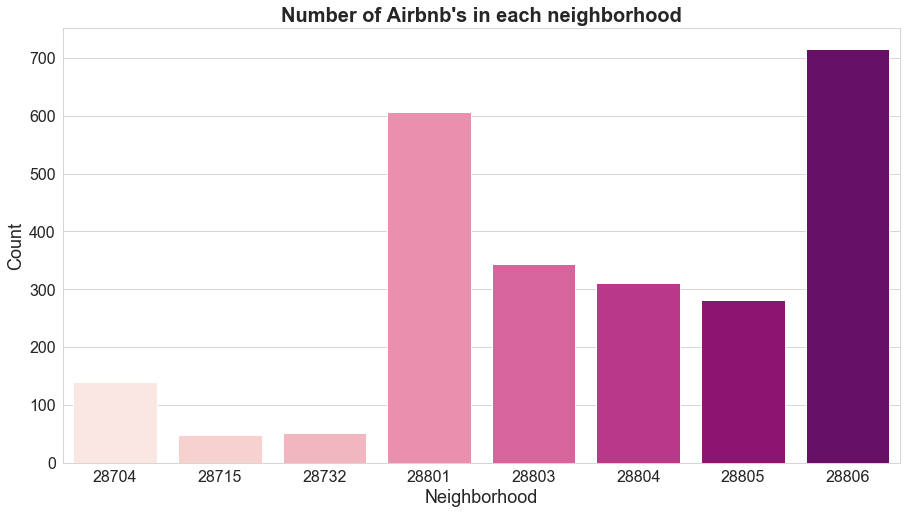

In [14]:
plt.figure(figsize = (15,8))
sns.countplot(airbnb['neighbourhood'], palette = "RdPu")
plt.title("Number of Airbnb's in each neighborhood",
          size = 20, fontweight = 'bold')
plt.ylabel("Count", size = 18)
plt.xlabel("Neighborhood", size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text yticklabel objects>)

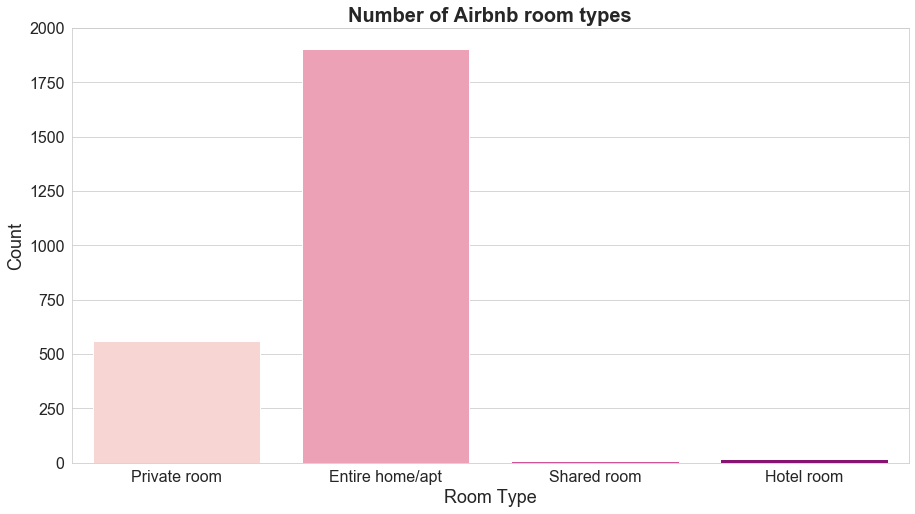

In [15]:
plt.figure(figsize = (15,8))
sns.countplot(airbnb['room_type'], palette = "RdPu")
plt.title("Number of Airbnb room types",
          size = 20, fontweight = 'bold')
plt.ylabel("Count", size = 18)
plt.xlabel("Room Type", size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text yticklabel objects>)

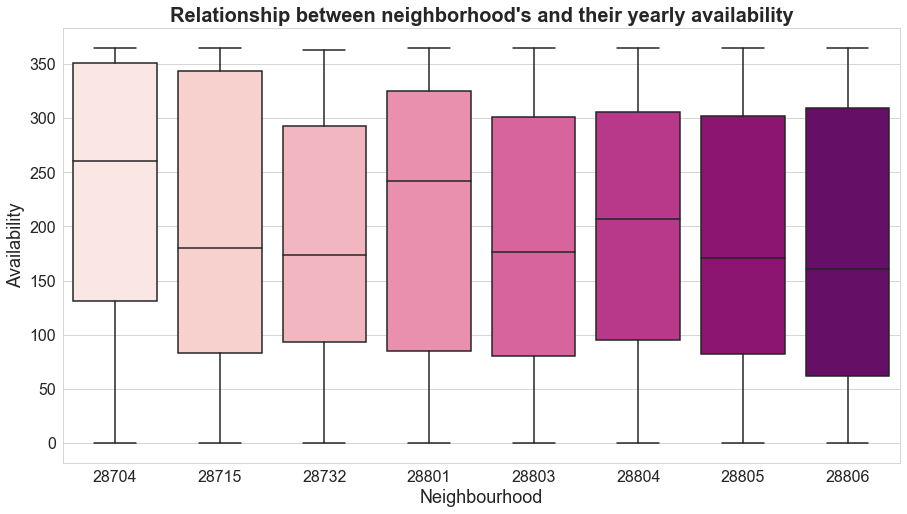

In [16]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = airbnb, x = 'neighbourhood', y = 'availability_365', 
            palette = "RdPu")
plt.title("Relationship between neighborhood's and their yearly availability",
          size = 20, fontweight = 'bold')
plt.ylabel("Availability", size = 18)
plt.xlabel("Neighbourhood", size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)

(array([35.35, 35.4 , 35.45, 35.5 , 35.55, 35.6 , 35.65, 35.7 ]),
 <a list of 8 Text yticklabel objects>)

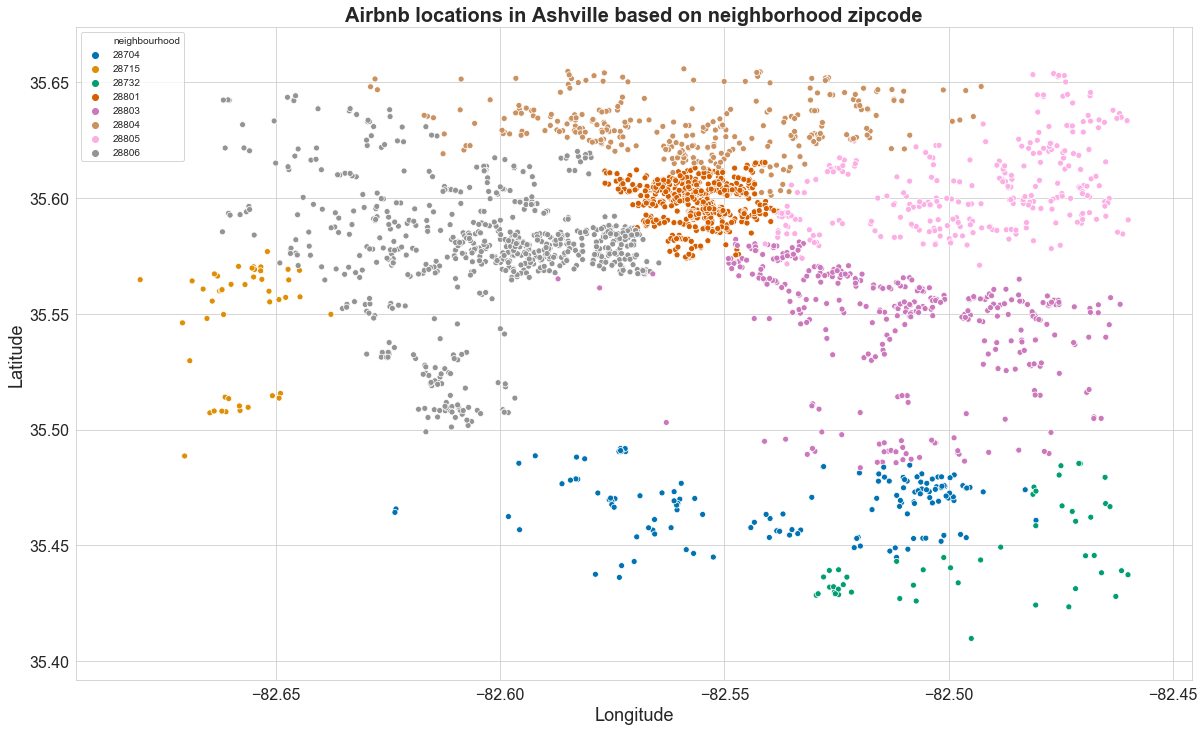

In [18]:
plt.figure(figsize = (20,12))
sns.scatterplot(data = airbnb, x = 'longitude', y = 'latitude', 
            hue = 'neighbourhood', palette = 'colorblind')
plt.title("Airbnb locations in Ashville based on neighborhood zipcode",
          size = 20, fontweight = 'bold')
plt.ylabel("Latitude", size = 18)
plt.xlabel("Longitude", size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)

(array([35.35, 35.4 , 35.45, 35.5 , 35.55, 35.6 , 35.65, 35.7 ]),
 <a list of 8 Text yticklabel objects>)

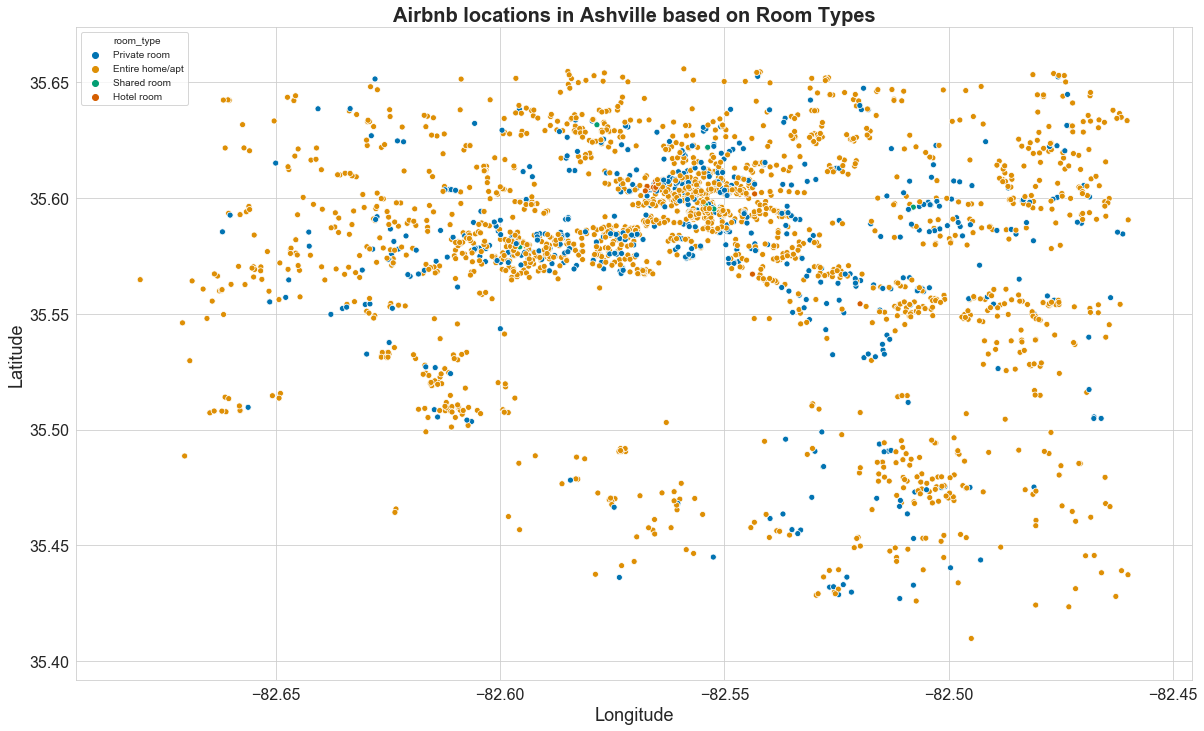

In [19]:
plt.figure(figsize = (20,12))
sns.scatterplot(data = airbnb, x = 'longitude', y = 'latitude', 
            hue = 'room_type', palette = 'colorblind')
plt.title("Airbnb locations in Ashville based on Room Types",
          size = 20, fontweight = 'bold')
plt.ylabel("Latitude", size = 18)
plt.xlabel("Longitude", size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)

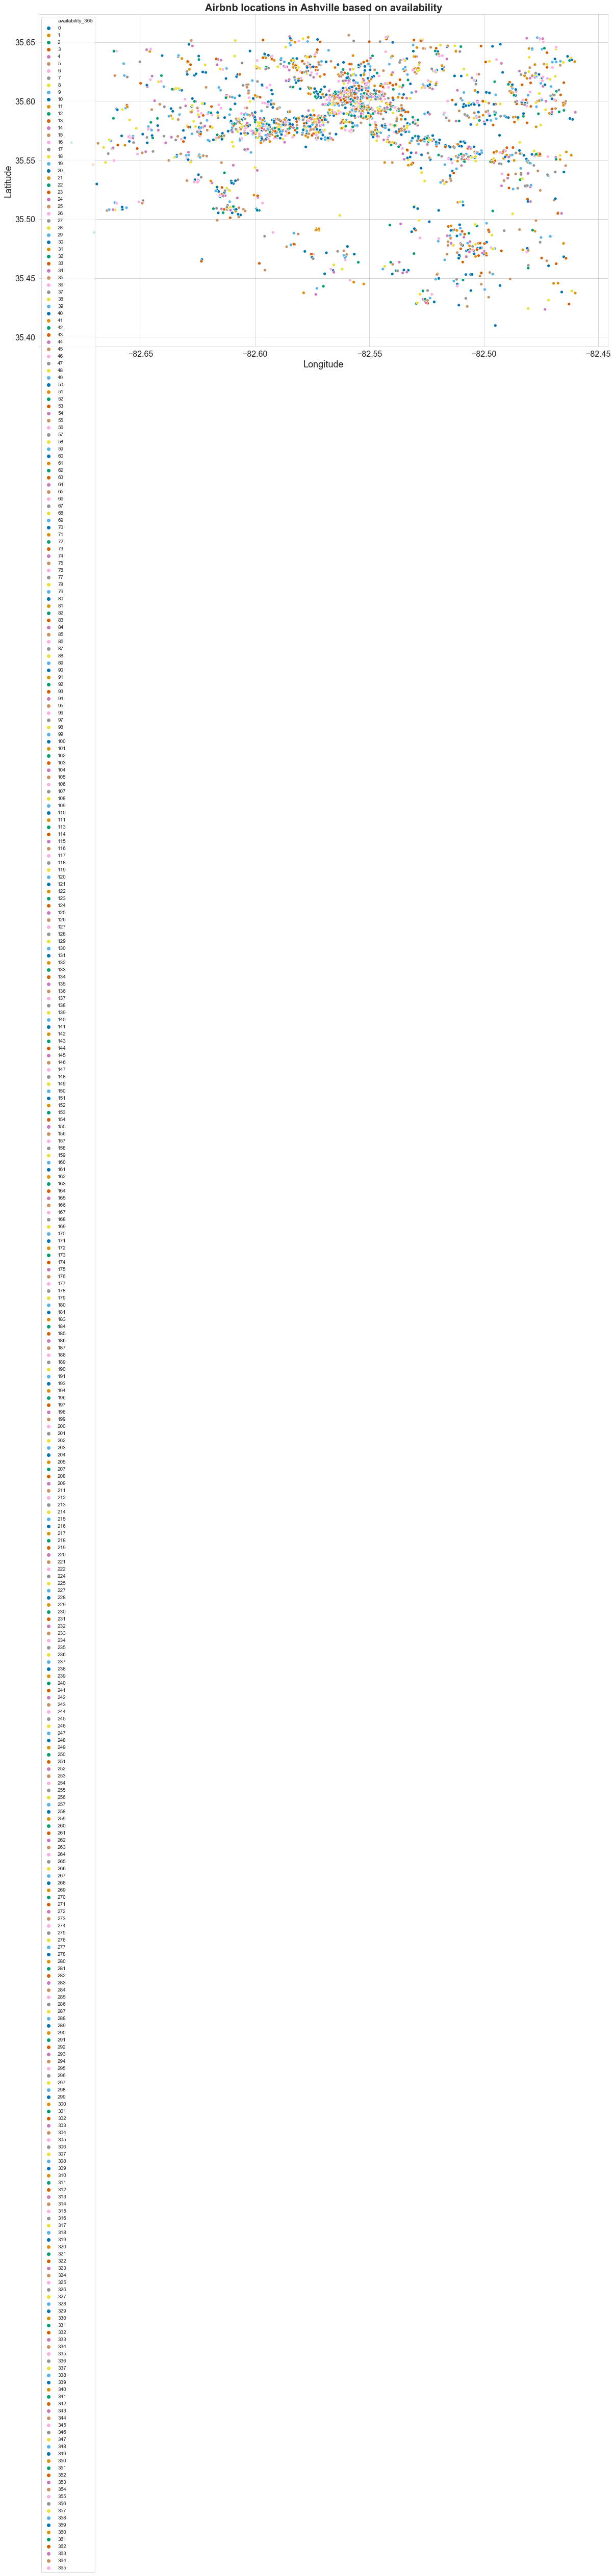

In [24]:
plt.figure(figsize = (20,12))
sns.scatterplot(data = airbnb, x = 'longitude', y = 'latitude', 
            hue = 'availability_365', palette = 'colorblind')
plt.title("Airbnb locations in Ashville based on availability",
          size = 20, fontweight = 'bold')
plt.ylabel("Latitude", size = 18)
plt.xlabel("Longitude", size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ioff()